## EDA CASE STUDY


#### Input files for analysis of all the sections

File provided with the case study: 

   `loan.zip`  (filesize : `8.8MB` , file format: `zipped archive`). Expanded file is `34.8 MB` Since the file is a zipped archive, we believe that the underlying file is highly compressed (in real time analytics) and want to explore opportunity of reading data from the zip file without expanding / extracting the file/files out of it for this we use "`Zipfile : https://docs.python.org/3/library/zipfile.html` <br>


### Import all the libraries

1) Import `Zipfile` , `numpy`, `panda` ,`matplotlib` , `seaborn` and `datetime` libraries. Plot libraries are being explored for conducing `Univariate` and `Bivariate` analysis <br>
2) Use `re` to use regular expression for cleaning data  and `gc` for  garbage collection(once entire analysis is completed) <br>

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime
# https://docs.python.org/3/library/zipfile.html
import zipfile
# https://docs.python.org/3/library/re.html
# regular expression is needed later in the coding to identify pattern in string and clean it up
#This functions must not be used for the replacement string in sub() and subn(), only backslashes should be escaped. For example:
# digits_re = r'\d+'
import re

import gc
# Perform Garbage collection at the end to remove any memory clutter due to temporary dataframes and variables
#sns.set_style("whitegrid")

##### Read the file using "`Zipfile : https://docs.python.org/3/library/zipfile.html` , print(len(lendingzipfile.infolist())) which returns just `1` in this case. If more files are present, the strategy to read multi-files within zip has to be devised (which also explores reading it into multiple frames if columns in each files are different etc.) . Since it is just a single file, the command for opening the file is  using the index "0" is pd.read_csv(lendingzipfile.open(lendingzipfile.infolist()[0]), quotechar = '"')  <br>


Call main dataframe ldf (stands for `loan data frame` ) 

In [2]:
# Mark the start timestamp of code execution
startTime = datetime.now()

print(startTime)
lendingzipfile = zipfile.ZipFile('loan.zip')
# print(len(lendingzipfile.infolist()))
# 1  [ length is 1, so just one file file within zip archive]
ldf = pd.read_csv(lendingzipfile.open(lendingzipfile.infolist()[0]), quotechar = '"')

2018-12-30 13:03:45.596699


#### Inspect data frame for null values and duplicates

This is an important step. 

1. Check if any duplicates and Count the total percentage of `null` values. the first command below does just that (reads the dataframe, assign the column and the percentage of null values to Panda series `tmp` <br>
2. `tmp` is converted back into Data frame `pct99plusnull` with index being Column name and value being the percentage nulls; <br>
3. Pick all the columns which have null percentage >= `99` if any <br>
4. Delete `tmp` after you're done with identifying the columns with >= 99 percent null values. print out `pct99plusnull` <br>


In [3]:
print ('###### Check for no Duplicates starts ####')
print(ldf.shape)
n1 = ldf.sort_values("id")
n1.head(2)
n1 = n1.drop_duplicates('id')
print(n1.shape)
print ('###### Check for no Duplicates ends ####')

tmp = round(100*(ldf.isnull().sum()/len(ldf.index)), 2)
pct99plusnull = pd.DataFrame({'Column_Name': tmp.index , 'Null_Percentage': tmp.values})
pct99plusnull = pct99plusnull.loc[pct99plusnull['Null_Percentage'] >= 99, :]

del tmp

# List all the columns that have > 99% Null values
# print(pct99plusnull)
pct99plusnull

###### Check for no Duplicates starts ####
(39717, 111)
(39717, 111)
###### Check for no Duplicates ends ####


,Column_Name,Null_Percentage
50,mths_since_last_major_derog,100.0
53,annual_inc_joint,100.0
54,dti_joint,100.0
55,verification_status_joint,100.0
57,tot_coll_amt,100.0
58,tot_cur_bal,100.0
59,open_acc_6m,100.0
60,open_il_6m,100.0
61,open_il_12m,100.0
62,open_il_24m,100.0


#### Clean data frame of columns with >= 99 % null values

1. With columns >= 99% null values identified, convert the dataframe column to a list , call it `pct99plusnullcols` <br>
2. Enumerate the columns from `pct99plusnullcols` through the main dataframe `ldf` and pick the indexes of columns containing >= 99 % null values , assign it back to `pct99plusnullcols` <br>
3. Drop the columns listed as `pct99plusnullcols` inplace= True so that `ldf` now is having a cleaned dataset for further analysis <br>
4. Print out the shape of ldf. It should return `(39717, 57)`

In [4]:
# Get list of null columns
pct99plusnullcols = list(pct99plusnull['Column_Name'])
# Iteraste through the list of null column indexes
pct99plusnullcols = [i for i in pct99plusnullcols if i in (round(100*(ldf.isnull().sum()/len(ldf.index)), 2)).index]
# Drop the null columns
ldf.drop(pct99plusnullcols, axis=1 , inplace = True)
# Inspect the shape
ldf.shape

(39717, 57)

##### Inspect the columns again

In [5]:
tmp = round(100*(ldf.isnull().sum()/len(ldf.index)), 2)
pctnull = pd.DataFrame({'Column_Name': tmp.index , 'Null_Percentage': tmp.values}).sort_values(by='Null_Percentage', ascending=False)
# = pct99plusnull.loc[pct99plusnull['Null_Percentage'] >= 99, :]

pctnull

,Column_Name,Null_Percentage
47,next_pymnt_d,97.13
29,mths_since_last_record,92.99
28,mths_since_last_delinq,64.66
19,desc,32.58
10,emp_title,6.19
11,emp_length,2.71
55,pub_rec_bankruptcies,1.75
45,last_pymnt_d,0.18
53,chargeoff_within_12_mths,0.14
49,collections_12_mths_ex_med,0.14


##### Impute records with highest null percentage after careful observation

1) `next_pymnt_d` is not useful since vast majority of data is blank. drop the column
2) `mths_since_last_record` is populated for some rows and we don't want to miss this and column may be utilized hence impute it as `0` for null values
3) `mths_since_last_delinq` is equally important to be missed out,  hence impute the null values with `0`



In [6]:
# mths_since_last_record is populated for some rows and we don't want to miss this and column may be utilized hence 
# impute it as 0 for NA
#mths_since_last_delinq is equally important to be missed out. hence impute the null values with 0

ldf['mths_since_last_record'] = pd.to_numeric(ldf['mths_since_last_record'].fillna('0'))
ldf['mths_since_last_delinq'] = pd.to_numeric(ldf['mths_since_last_delinq'].fillna('0'))

# next_pymnt_d is not useful since vast majority of data is blank. hence drop column / prune it off the dataset
ldf.drop('next_pymnt_d', axis=1 , inplace = True)
ldf.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


##### `Desc` column pruning , derive `positive_keyword` indicator which can be applied in analysis

`Desc` column has some positive keywords that can be an indicator of good loans, identify the rows that have them and mark the rows as `positive_keyword`. Once this is done, you can drop `Desc` as the useful extraction is done and the entire sentence as such is not too helpful in analysis

In [7]:
#identify and prepare a list of positive keywords 
positive_keywords = ['pay', 'close', 'hopeful' ,'clean', 'opportunity',
                    'definitely' , 'very stable' , 'ready' , 'stable' , 'responsible' , 'job']

negative_keywords = [ 'difficult', 'sorry' , 'hard' , 'borrowed' 'late' , 'crazy',
                      'stop', 'tax' , 'pinch' , 'late', 'purchase' , 'bill' , 'sulk' , 'no' , 'bad',
                       'sad' , 'horrible' , 'worry' , 'cry' , 'angry' , 'cheat' , 'defeat' , 'spend' ,
                        'not' , 'loan' , 'debt' , 'expense' , 'credit card' , 'creditors' , 'lien' , 'acation' ]

# Credit, Credit card etc indicate more lines of credit and are negative for our loan. We need individuals
# Who have lesser 'other obligations' , so they pay us first
# Vacation as well is not good reason enough to seek loan for those who cannot payoff 
# V can be Caps or small and hence only "acation" included
# Use str.findall() function to identify if these keywords are present in description

ldf['tmp'] = pd.to_numeric(ldf['desc'].str.findall('|'.join(positive_keywords)).str.len())


positive_1 = ldf.loc[(ldf.tmp > 0) , :]
positive_0 = ldf.loc[~(ldf.tmp > 0) , :]

positive_1['positive_keyword'] = 1  # positive keywords from description
positive_0['positive_keyword'] = 0  # no positive indicator from description

ldf = pd.concat([positive_1, positive_0], axis = 0)
print(ldf.shape)



ldf['tmp'] = pd.to_numeric(ldf['desc'].str.findall('|'.join(negative_keywords)).str.len())


negative_1 = ldf.loc[(ldf.tmp > 0) , :]
negative_0 = ldf.loc[~(ldf.tmp > 0) , :]

negative_1['negative_keyword'] = 1  # negative keywords from description
negative_0['negative_keyword'] = 0  # no negative indicator from description



ldf = pd.concat([negative_1, negative_0], axis = 0)

# Drop the description column after extracting the positive indicator
ldf.drop('desc', axis=1 , inplace = True)

# print out the shape of the dataset to assess rows/columns
print(ldf.shape)
ldf.head(3)




(39717, 58)
(39717, 58)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,tmp,positive_keyword,negative_keyword
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,1,INDIVIDUAL,0,0.0,0,0.0,0.0,3.0,1,1
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2.0,1,1
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,1,INDIVIDUAL,0,0.0,0,0.0,0.0,3.0,1,1


In [8]:
positive_keyword_typ = pd.pivot_table(ldf, index=['positive_keyword'], 
                                   values='id', 
                                 aggfunc='count')
positive_keyword_typ

,id
positive_keyword,
0,20599
1,19118


#### To display all columns clearly since we have a large data set, use set_options 

In [9]:
#https://pandas.pydata.org/pandas-docs/stable/options.html
print(ldf.shape)
# Display all the columns clearly, using this option you will not be shown "..." while many columns are present
# Also the second command will set the column width correctly. You can atleast see all the contents very clearly using 
# this command. Refer to https://pandas.pydata.org/pandas-docs/stable/options.html for more details

pd.set_option('max_columns', 57)
pd.set_option('display.max_colwidth', 150)

ldf.head(1)

(39717, 58)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,tmp,positive_keyword,negative_keyword
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1076863,other,personel,917xx,CA,20.0,0,Feb-96,1,35.0,...,0,5598,21%,37,f,0.0,0.0,12231.89,12231.89,10000.0,2214.92,16.97,0.0,0.0,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,3.0,1,1


##### Prune some more columns

1. As can be seen above, URL is the same as id column except with addition of `https://lendingclub.com/browse/loanDetail.action?loan_id=`, this is not very useful, Prune this column
2. Also, analyse `application_type` , `acc_now_delinq`, `pymnt_plan` ,`initial_list_status` ,`policy_code`, `acc_now_delinq`, `tax_liens`,`chargeoff_within_12_mths`,`collections_12_mths_ex_med` <br>

Note that none of these columns add any value since they contain just one vslue and hence they will be removed from the analysis (in the next step)

In [10]:
# At first, pivot and list out all the columns printed just in the above step that you visually suspect
# to be a single value . Once you pivot it, if you observe a single value, then remove these columns

tmp = pd.pivot_table(ldf, index=['application_type'], 
                                   values='id', 
                                 aggfunc='count')
print(tmp)

tmp = pd.pivot_table(ldf, index=['acc_now_delinq'], 
                                   values='id', 
                                 aggfunc='count')
print(tmp)


tmp = pd.pivot_table(ldf, index=['pymnt_plan'], 
                                   values='id', 
                                 aggfunc='count')
print(tmp)

tmp = pd.pivot_table(ldf, index=['initial_list_status'], 
                                   values='id', 
                                 aggfunc='count')
print(tmp)

tmp = pd.pivot_table(ldf, index=['policy_code'], 
                                   values='id', 
                                 aggfunc='count')
print(tmp)

tmp = pd.pivot_table(ldf, index=['acc_now_delinq'], 
                                   values='id', 
                                 aggfunc='count')
print(tmp)

tmp = pd.pivot_table(ldf, index=['tax_liens'], 
                                   values='id', 
                                 aggfunc='count')
print(tmp)

tmp = pd.pivot_table(ldf, index=['chargeoff_within_12_mths'], 
                                   values='id', 
                                 aggfunc='count')
print(tmp)

tmp = pd.pivot_table(ldf, index=['collections_12_mths_ex_med'], 
                                   values='id', 
                                 aggfunc='count')
print(tmp)   

                     id
application_type       
INDIVIDUAL        39717
                   id
acc_now_delinq       
0               39717
               id
pymnt_plan       
n           39717
                        id
initial_list_status       
f                    39717
                id
policy_code       
1            39717
                   id
acc_now_delinq       
0               39717
              id
tax_liens       
0.0        39678
                             id
chargeoff_within_12_mths       
0.0                       39661
                               id
collections_12_mths_ex_med       
0.0                         39661


In [11]:
# Let's remove these columns now that we have identified them
ldf.drop(['url', 
          'application_type' , 
          'acc_now_delinq' , 
          'pymnt_plan' , 
          'initial_list_status' ,
          'policy_code' , 
          'acc_now_delinq', 
          'tax_liens',
           'chargeoff_within_12_mths', 
          'collections_12_mths_ex_med',
          'tmp'], axis=1 , inplace = True)
ldf.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,delinq_amnt,pub_rec_bankruptcies,positive_keyword,negative_keyword
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.0,0,Feb-96,1,35.0,0.0,10,0,5598,21%,37,0.0,0.0,12231.89,12231.89,10000.0,2214.92,16.97,0.0,0.0,Jan-15,357.48,Apr-16,0,0.0,1,1


##### Clean up the columns

1. Remove `months` keyword from `term` column, convert the column to integer  <br>
2. Remove % from `int_rate` and `Revol_util` columns , convert the column to integer <br>

Use Regular expression; for patterns used here , refer to  `https://docs.python.org/3/library/re.html` <br>

pattern syntax used in this exercise from URL given above  : `digits_re = r'\d+'`

In [12]:
ldf['int_rate'] = pd.to_numeric (ldf['int_rate'].apply(lambda col: re.search(r'\d+', col).group()))
ldf['term'] = pd.to_numeric(ldf['term'].apply(lambda col: re.search(r'\d+', col).group()))
ldf['zip_code'] = pd.to_numeric(ldf['zip_code'].apply(lambda col: re.search(r'\d+', col).group()))
ldf.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,delinq_amnt,pub_rec_bankruptcies,positive_keyword,negative_keyword
3,1076863,1277178,10000,10000,10000.0,36,13,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917,CA,20.0,0,Feb-96,1,35.0,0.0,10,0,5598,21%,37,0.0,0.0,12231.89,12231.89,10000.0,2214.92,16.97,0.0,0.0,Jan-15,357.48,Apr-16,0,0.0,1,1


##### Convert `MMM-YY` to datetime format

Convert all the date columns to correct format that can be used

In [13]:
# Convert date columns to correct format
# http://strftime.org/

ldf['issue_d'] = pd.to_datetime(ldf['issue_d'],  format='%b-%y' )
ldf['earliest_cr_line'] = pd.to_datetime(ldf['earliest_cr_line'],  format='%b-%y' )
ldf['last_pymnt_d'] = pd.to_datetime(ldf['last_pymnt_d'],  format='%b-%y' )
ldf['last_credit_pull_d'] = pd.to_datetime(ldf['last_credit_pull_d'],  format='%b-%y' )

ldf.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,delinq_amnt,pub_rec_bankruptcies,positive_keyword,negative_keyword
3,1076863,1277178,10000,10000,10000.0,36,13,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,personel,917,CA,20.0,0,1996-02-01,1,35.0,0.0,10,0,5598,21%,37,0.0,0.0,12231.89,12231.89,10000.0,2214.92,16.97,0.0,0.0,2015-01-01,357.48,2016-04-01,0,0.0,1,1


##### Do a final check on the columns 

When checked, data is now in usable state with the columns that we need, perform analysis

In [14]:
# Identify total null percentage using the computation step given here ; once identified, sort descending and print 
# to see the list 
tmp = round(100*(ldf.isnull().sum()/len(ldf.index)), 2)
pctnull = pd.DataFrame({'Column_Name': tmp.index , 'Null_Percentage': tmp.values}).sort_values(by='Null_Percentage', ascending=False)
# = pct99plusnull.loc[pct99plusnull['Null_Percentage'] >= 99, :]

print(ldf.shape)
pctnull

(39717, 48)


,Column_Name,Null_Percentage
10,emp_title,6.19
11,emp_length,2.71
45,pub_rec_bankruptcies,1.75
41,last_pymnt_d,0.18
30,revol_util,0.13
18,title,0.03
43,last_credit_pull_d,0.01
0,id,0.00
35,total_pymnt_inv,0.00
28,pub_rec,0.00


In [15]:
ldf.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,delinq_amnt,pub_rec_bankruptcies,positive_keyword,negative_keyword
3,1076863,1277178,10000,10000,10000.0,36,13,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,personel,917,CA,20.00,0,1996-02-01,1,35.0,0.0,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.0,0.0,2015-01-01,357.48,2016-04-01,0,0.0,1,1
4,1075358,1311748,3000,3000,3000.0,60,12,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,other,Personal,972,OR,17.94,0,1996-01-01,0,38.0,0.0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.0,0.0,2016-05-01,67.79,2016-05-01,0,0.0,1,1
6,1069639,1304742,7000,7000,7000.0,60,15,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,Loan,280,NC,23.51,0,2005-07-01,1,0.0,0.0,7,0,17726,85.60%,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.0,0.0,2016-05-01,1313.76,2016-05-01,0,0.0,1,1


#### `Loan_amnt`, `Funded_amnt` and `Funded_amnt_inv` look more or less like the same. Before assuming anything just from the name, let us see if these columns are strongly correlated with each other. For such analysis on columns involving only numbers, we go for heat map analysis

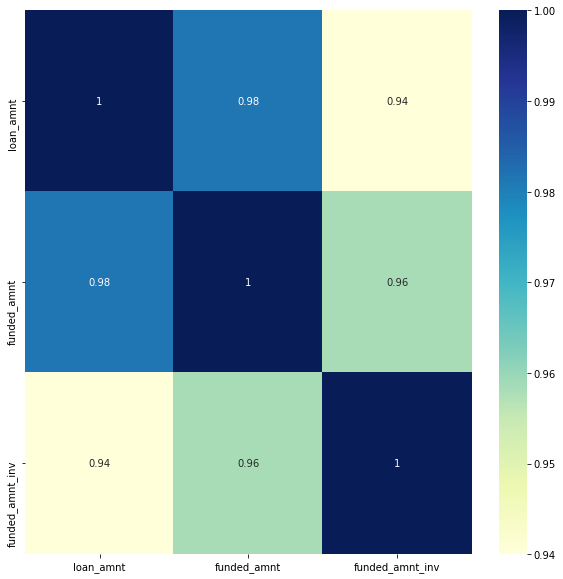

In [16]:
ldf_loancol_df = ldf[['loan_amnt'  , 'funded_amnt' , 'funded_amnt_inv']].corr()
# round off by 3 digits
round(ldf_loancol_df, 3) 
# sns.pairplot(ldf_loancol_df)
plt.figure(figsize=(10, 10))
sns.heatmap( ldf_loancol_df, cmap="YlGnBu", annot=True)

 
Three columns look alike. We use heat map to ascertain if the columns are more or less having similar value and if using any of the either columns is any different? 

Results:

`“Loan_amnt”` is `98%` correlated with  `”Funded_amnt”`
`“Loan_amnt”` is `94%` correlated with `“Funded_amnt_inv”`

`We use ”Loan_amnt” and ignore other two columns for all our aggregations on the data set where loan calculations are involved`

##### Note: Pivot tables are used extensively by us to categorize the data (which is converted to data set) and then the plot function is applied. This simplifies the plotting and analysis


#### We will be using Segmented Univariate , Univariate and Bivariate analysis in the sections that follow below

##### Let us analyse the loan Spread

`Fully paid loans/Current/Charged Off` loans will be analysed across long-term /60 months and short-term / 30 months

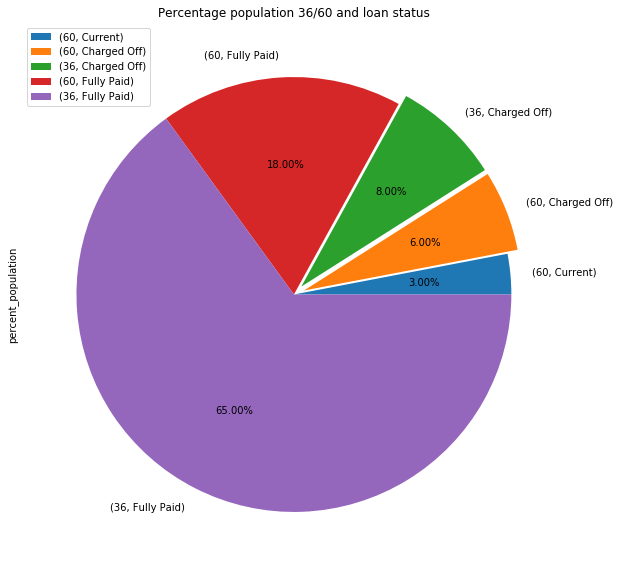

In [17]:
# More often pie charts are to be used carefully. We have an opportunity to showcase our analysis using pie
# Chart, hence we are using them here
# ldf.groupby(['term', 'loan_status'])['loan_amnt'].size().unstack().plot(kind='bar', stacked = True , figsize=(10, 10), title='loan Status and Loan Term for various borrowings' )
ldf_spread  = ldf.pivot_table(values = 'id', index = ['term','loan_status'], aggfunc = 'count').reindex()

ldf_spread['percent_population'] = round((ldf_spread.id/ len(ldf)),2)*100

ldf_spread = ldf_spread.sort_values('percent_population', ascending= True).reindex()
# Note that "explode" is generally used to highlight the chunk of the pie that you want highlighted
explode = (0,0.05,0.05,0,0)
ldf_spread.plot.pie(y = 'percent_population', figsize=(10, 10), autopct='%1.2f%%' , explode = explode ,
                    title='Percentage population 36/60 and loan status' )


As can be clearly seen in the figure above, Here is the summary:

1) `8%` of loans for `36 months`is `Charged off` ; `6%` of loans for `60 months`is `Charged off` <br>
2) `Current` loan constitutes only `3%` of the dataset and is for `60 months` <br>
3) `65%` of loans  for `36 months` is `Fully paid`, `18%` of loans for `60 months` is `Fully paid`  <br>

#### Let's analyse defaulters by seeing the spread for `Charged Off` loans

We will analyse the spread for `Charged Off` loans mainly because we can prevent mishaps if we identify a congitive pattern

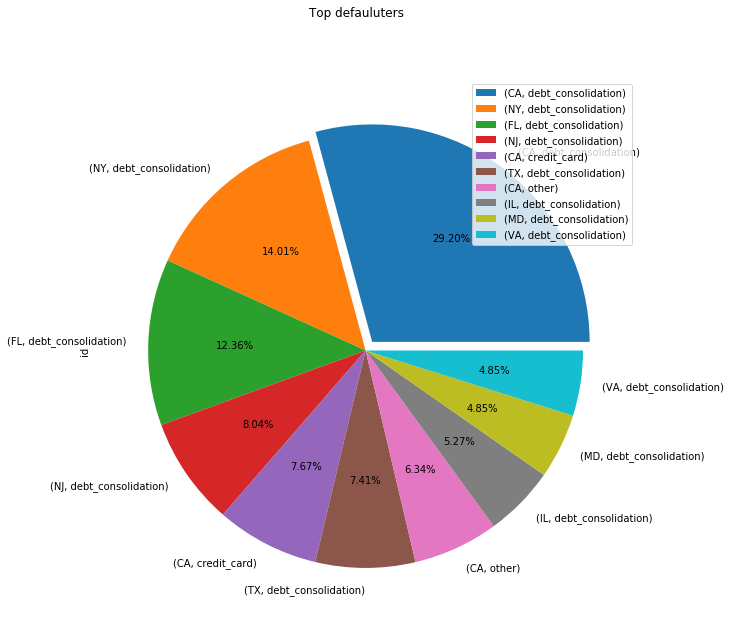

In [18]:
# Pivot the variable/(s), sort the same and and draw the chart
ldf_charged_off = ldf.loc[ (ldf['loan_status'] == 'Charged Off'), :]
ldf_charged_off_zip3_analysis  = ldf_charged_off.pivot_table(values = 'id', 
                                                             index = ['addr_state','purpose'], 
                                                            aggfunc = 'count').reindex()

# Note that "explode" is generally used to highlight the chunk of the pie that you want highlighted

explode = (0.05,0,0, 0,0,0,0,0,0,0)
ldf_default_top_10 =  ldf_charged_off_zip3_analysis.sort_values('id', ascending= False).head(10).reindex()
plt = ldf_default_top_10.plot.pie(subplots=True, figsize=(10, 10), autopct='%1.2f%%' , explode = explode , title = 'Top defauluters' )

##### Summary Top 3 defaulters

1) `29%` from State of `CA` has highest number of defaulters / Charge-off's  who secured loan for `debt_consolidation` <br>
2) `14%` from State of `NY` has second highest number of defaulters / Charge-off's  who secured loan for `debt_consolidation` <br>
3) `12%` from State of `FL` has third highest number of defaulters / Charge-off's  who secured loan for `debt_consolidation` <br>


##### All these states defaulted on `Debt consolidation`. This is because of poor financial management by these individuals. Let's analyse debt to income ratio and any other parameters that will help us analyse these individuals <br>


Let us identify `Top 5` defaulter zipcodes in `60 months` and `36 months`



In [19]:

ldf_zipcode_36 = ldf_charged_off.loc[ (ldf['term'] ==  36), :]
ldf_zipcode_60 = ldf_charged_off.loc[ (ldf['term'] ==  60), :]

ldf_zipcode_36 = ldf_zipcode_36.groupby(['zip_code' , 'addr_state' ])['loan_amnt'].sum().sort_values(ascending = False).head(5)
ldf_zipcode_36 = pd.DataFrame({'Zip_Code': ldf_zipcode_36.index , 'Total_Loan_Amount': ldf_zipcode_36.values})
ldf_zipcode_36['Term'] = 36


ldf_zipcode_60 = ldf_zipcode_60.groupby(['zip_code' , 'addr_state' ])['loan_amnt'].sum().sort_values(ascending = False).head(5)
ldf_zipcode_60 = pd.DataFrame({'Zip_Code': ldf_zipcode_60.index , 'Total_Loan_Amount': ldf_zipcode_60.values})
ldf_zipcode_60['Term'] = 60

ldf_zipcode = pd.concat([ldf_zipcode_36, ldf_zipcode_60], axis = 0)


ldf_zipcode

,Zip_Code,Total_Loan_Amount,Term
0,"(100, NY)",543675,36
1,"(900, CA)",511800,36
2,"(917, CA)",475700,36
3,"(945, CA)",470150,36
4,"(112, NY)",461400,36
0,"(945, CA)",598650,60
1,"(70, NJ)",499725,60
2,"(330, FL)",499350,60
3,"(926, CA)",466450,60
4,"(100, NY)",437700,60


`Top 5` defaulting zip codes and states for `36 months loans` <br>

Zip_Code	Total_Loan_amount <br> 
1) 	(100xx, NY)	543675	 <br>
2)	(900xx, CA)	511800	 <br>
3)	(917xx, CA)	475700	 <br>
4)	(945xx, CA)	470150	 <br>
5) 	(112xx, NY)	461400	 <br>
<br>

 `Top 5` defaulting zip codes and states for `60 months loans` <br>

Zip_Code	Total_Loan_amount <br> 
     
1) (945xx, CA)	598650	 <br>
2)	(070xx, NJ)	499725	 <br>
3) 	(330xx, FL)	499350	 <br>
4)	(926xx, CA)	466450	 <br>
5)	(100xx, NY)	437700	 <br>
<br>

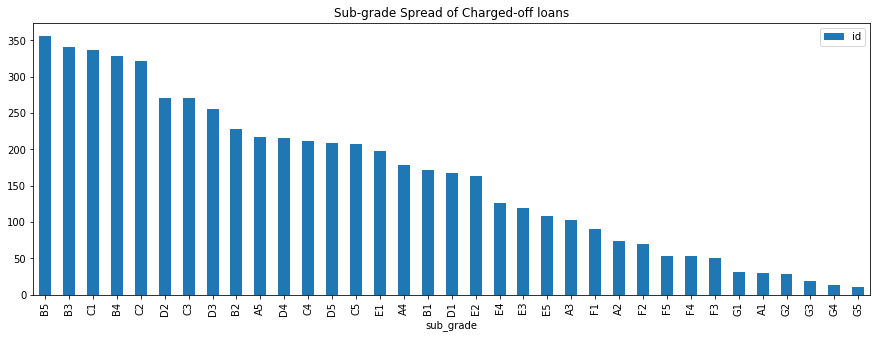

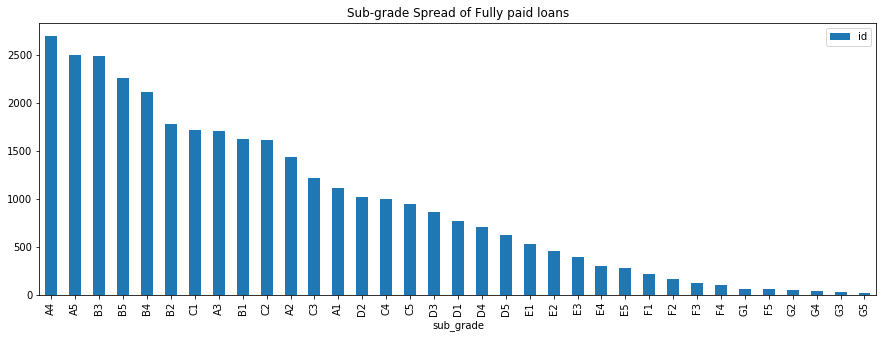

In [20]:
# Pivot the variable/(s), sort the same and and draw the chart
ldf_fully_paid = ldf.loc[ (ldf['loan_status'] == 'Fully Paid'), :]

#ldf_charged_off.groupby(['sub_grade']).size().plot(kind='barh', figsize=(8, 8), sort_columns=1) 

ldf_co_subgrade  = ldf_charged_off.pivot_table(values = 'id', index = ['sub_grade'], 
                                                            aggfunc = 'count').reindex()
ldf_co_subgrade = ldf_co_subgrade.sort_values('id', ascending= False).plot(kind='bar', figsize=(15, 5) ,
                                                                      title = 'Sub-grade Spread of Charged-off loans')   

ldf_fp_subgrade  = ldf_fully_paid.pivot_table(values = 'id', index = ['sub_grade'], 
                                                            aggfunc = 'count').reindex()
ldf_fp_subgrade = ldf_fp_subgrade.sort_values('id', ascending= False).plot(kind='bar', figsize=(15, 5) ,
                                                                      title = 'Sub-grade Spread of Fully paid loans')  

##### Summary

1) `B5`, `B3` and `C1` constitutes top 1,2 and 3 Charge-Off's (or worst performing loans) <br>
2) `A4`, `A5` and `B3` constitutes top 1,2 and 3 choice of investment notes/sub-grades (best performing loans) <br>



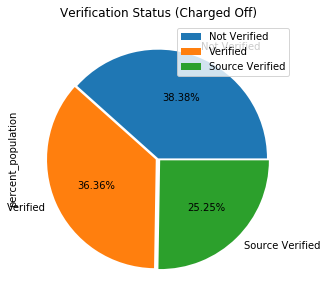

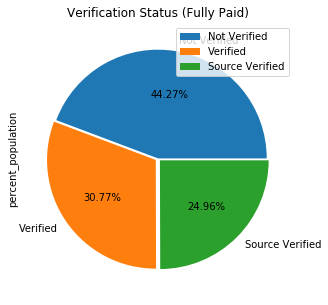

In [21]:
ldf_co_verify  = ldf_charged_off.pivot_table(values = 'id', index = ['verification_status'], 
                                                            aggfunc = 'count').reindex()
ldf_co_verify = ldf_co_verify.sort_values('id', ascending= False)
ldf_co_verify['percent_population'] = round((ldf_co_verify.id/ len(ldf_charged_off)),2)*100
#ldf_co_verify['percent_population' ].plot(kind='bar', figsize=(5, 5) , title = 'Verification_status' )   
explode = (0 , 0.025, 0.025)

ldf_co_verify.plot.pie(y = 'percent_population', figsize=(5, 5), autopct='%1.2f%%' , explode = explode,   title='Verification Status (Charged Off)' )


ldf_fully_paid = ldf.loc[ (ldf['loan_status'] == 'Fully Paid'), :]
ldf_co_verify  = ldf_fully_paid.pivot_table(values = 'id', index = ['verification_status'], 
                                                            aggfunc = 'count').reindex()
ldf_co_verify = ldf_co_verify.sort_values('id', ascending= False)
ldf_co_verify['percent_population'] = round((ldf_co_verify.id/ len(ldf_charged_off)),2)*100
#ldf_co_verify['percent_population' ].plot(kind='bar', figsize=(5, 5) , title = 'Verification_status' ) 

# Note that "explode" is generally used to highlight the chunk of the pie that you want highlighted
explode = (0, 0.025, 0.025)
ldf_co_verify.plot.pie(y = 'percent_population', figsize=(5, 5), autopct='%1.2f%%' , explode = explode,  title='Verification Status (Fully Paid)' )

#### Summary of Verification status of Charged-off loans

1) `Not Verified` loans are `38.38%` for `Charged Off` loans ; `44.27%` for `Fully Paid` loans  <br>
2) `Verified` loans are `36.36%` for `Charged Off` loans ; `30.77%` for `Fully Paid` loans  <br>
3) `Source Verified` loans are `25.25%` for `Charged Off` loans ; `24.96%` for `Fully Paid` loans  <br>

This tells us the following : <br>

1) `Increasing` the `Source Verification` for the loans did not help avoid defaulting on the loans <br>
2) `Increasing` the `Verification` for the loans did not help either <br>

`Let's see if the default/Charge-off is occuring on any particular threshold of loan amount`

**************** 
STATISTICAL ANALYSIS - WHAT'S THE USUAL DEFAULTED LOAN AMOUNT 
**************** 
MEAN 12104.385107517328
MEDIAN 10000.0
1ST QUANTILE (Q1) 5600.0
2ND QUANTILE (Q2) 10000.0
3RD QUANTILE (Q3) 16500.0
4TH QUANTILE (Q4)  35000.0
**************** 
STATISTICAL ANALYSIS - FULLY PAID LOAN, WHAT IS THE LOAN AMOUNT
**************** 
MEAN 10866.455993930198
MEDIAN 9600.0
1ST QUANTILE (Q1) 5200.0
2ND QUANTILE (Q2) 9600.0
3RD QUANTILE (Q3) 15000.0
4TH QUANTILE (Q4)  35000.0


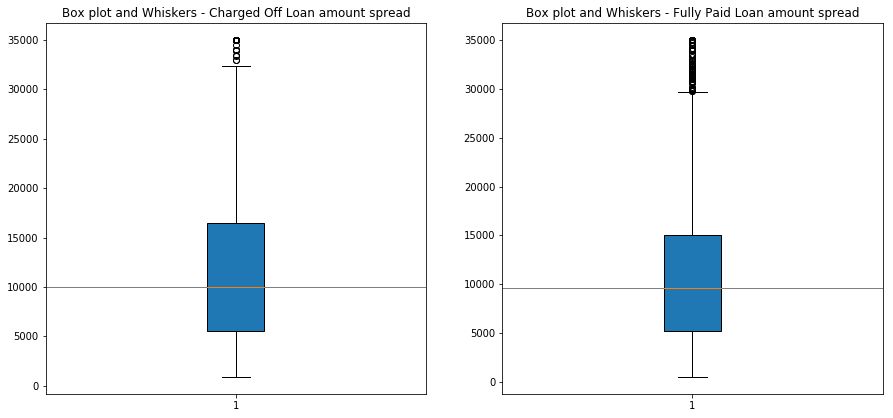

In [22]:
import matplotlib.pyplot as plt


# Note that we also print out the MEDIAN and PERCENTILES for convenience
# we then use axhline to mark the median

print ("**************** ")
print ("STATISTICAL ANALYSIS - WHAT'S THE USUAL DEFAULTED LOAN AMOUNT ")
print ("**************** ")
print ("MEAN" , ldf_charged_off.loan_amnt.mean())
print ("MEDIAN" , ldf_charged_off.loan_amnt.median())
print ("1ST QUANTILE (Q1)" , ldf_charged_off.loan_amnt.quantile(0.25))
print ("2ND QUANTILE (Q2)" , ldf_charged_off.loan_amnt.quantile(0.50))
# Median same as Q2
print ("3RD QUANTILE (Q3)" , ldf_charged_off.loan_amnt.quantile(0.75))
print ("4TH QUANTILE (Q4) " , ldf_charged_off.loan_amnt.quantile(1))



print ("**************** ")
print ("STATISTICAL ANALYSIS - FULLY PAID LOAN, WHAT IS THE LOAN AMOUNT")
print ("**************** ")
print ("MEAN" , ldf_fully_paid.loan_amnt.mean())
print ("MEDIAN" , ldf_fully_paid.loan_amnt.median())
print ("1ST QUANTILE (Q1)" , ldf_fully_paid.loan_amnt.quantile(0.25))
print ("2ND QUANTILE (Q2)" , ldf_fully_paid.loan_amnt.quantile(0.50))
# Median same as Q2
print ("3RD QUANTILE (Q3)" , ldf_fully_paid.loan_amnt.quantile(0.75))
print ("4TH QUANTILE (Q4) " , ldf_fully_paid.loan_amnt.quantile(1))




plt.figure(1 , figsize=(15, 15))

#Syntax for Reference line "axhline" snf "patch_artist" is sourced from https://matplotlib.org

# subplot 1
plt.subplot(2, 2, 1)
plt.title("Box plot and Whiskers - Charged Off Loan amount spread")
plt.boxplot(ldf_charged_off['loan_amnt'] , patch_artist=True)
plt.axhline(10000, color='black', lw=.5)

plt.subplot(2, 2, 2)
plt.title("Box plot and Whiskers - Fully Paid Loan amount spread")
plt.boxplot(ldf_fully_paid['loan_amnt'] , patch_artist=True)
plt.axhline(9600, color='black', lw=.5)

plt.show()

#### Summary

No paritcular difference when threshold for  Charged-off and Fully paid loans were compared for loan amount<br>



`let's analyse Debt to Income ratio to see if individuals who defaulted due to lack of good financial habits`. <br>

For this, we will need to <br>
1) Compute Annual salary and divide it by 12 to obtain monthly salary <br>
2) Divide  `installment`by `monthly salary` obtained in earlier step to obtain the total debt to total income ratio. This is one of the indicators that has to be always healthy as per https://smartasset.com/credit-cards/what-is-a-good-debt-to-income-ratio <br>

Basically, lower the Debt to Income ratio, the better is your financial health. let's analyse  <BR>
    
##### As we already have DTI field, we don't need to recompute Debt to Income ratio and will be using the DTI field from the dataset

MEDIAN CHARGED OFF 14.29
MEDIAN FULLY PAID 13.2
MEDIAN CURRENT 15.05


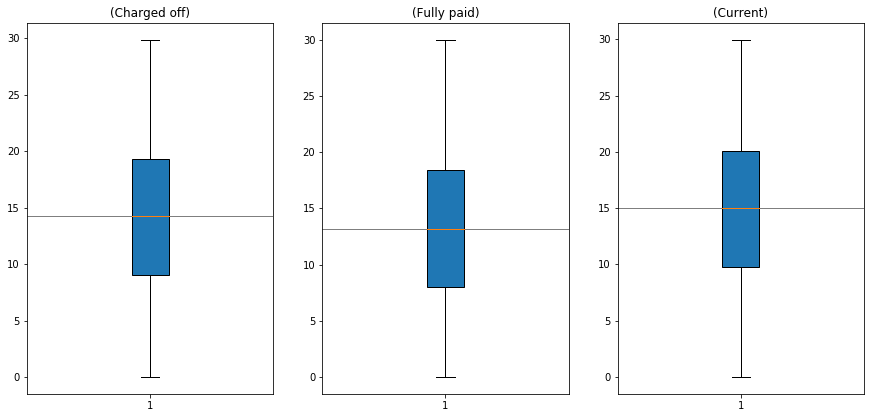

In [23]:
#ldf['monthly_salary'] = ldf.annual_inc/12
#ldf['debt_to_income_ratio'] = 100 * round (ldf.installment / ldf.monthly_salary , 2)

# Debt to Income ratio is already calculated in field DTI, we hence commented our code and used field directly for 
# our analysis

#Note that every time we are recreating ldf_fully_paid, ldf_charged_off, ldf_current datasets so that any new
# columns added in previous steps for any analysis get purged and a fresh dataset for analysis is available

ldf_fully_paid = ldf.loc[ (ldf['loan_status'] == 'Fully Paid'), :]
ldf_charged_off = ldf.loc[ (ldf['loan_status'] == 'Charged Off'), :]
ldf_current = ldf.loc[ (ldf['loan_status'] == 'Current'), :]


#Syntax for Reference line "axhline" snf "patch_artist" is sourced from https://matplotlib.org
print ("MEDIAN CHARGED OFF" , ldf_charged_off.dti.median())
print ("MEDIAN FULLY PAID" , ldf_fully_paid.dti.median())
print ("MEDIAN CURRENT" , ldf_current.dti.median())


plt.figure(1 , figsize=(15, 15))

# subplot 1
plt.subplot(2, 3, 1)
plt.title("(Charged off)")
plt.boxplot(ldf_charged_off['dti'] , patch_artist=True)
plt.axhline(14.29, color='black', lw=.5)

plt.subplot(2, 3, 2)
plt.title("(Fully paid)")
plt.boxplot(ldf_fully_paid['dti'] , patch_artist=True)
plt.axhline(13.2, color='black', lw=.5)

plt.subplot(2, 3, 3)
plt.title("(Current)")
plt.boxplot(ldf_current['dti'] , patch_artist=True)
plt.axhline(15.05, color='black', lw=.5)

#### Summary of the Debt to Income analysis

1) As can clearly be seen, in the past for the `Fully paid` loans, the Debt to Income ratio stayed low at `13.2%` <br>
2) It is also seen that for `Charged Off` loans, the Debt to Income ratio increased to `14.29%` <br>
3) This is an alarm for `Current` loans as the Debt to Income ratio is `15.05%`, so the probability of default is higher ; i.e. if one is not managing finances better, don't approve the loans<br>

In [24]:
ldf.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,delinq_amnt,pub_rec_bankruptcies,positive_keyword,negative_keyword
3,1076863,1277178,10000,10000,10000.0,36,13,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,personel,917,CA,20.00,0,1996-02-01,1,35.0,0.0,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.0,0.0,2015-01-01,357.48,2016-04-01,0,0.0,1,1
4,1075358,1311748,3000,3000,3000.0,60,12,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,other,Personal,972,OR,17.94,0,1996-01-01,0,38.0,0.0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.0,0.0,2016-05-01,67.79,2016-05-01,0,0.0,1,1


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a26f7c668>,
      dtype=object)

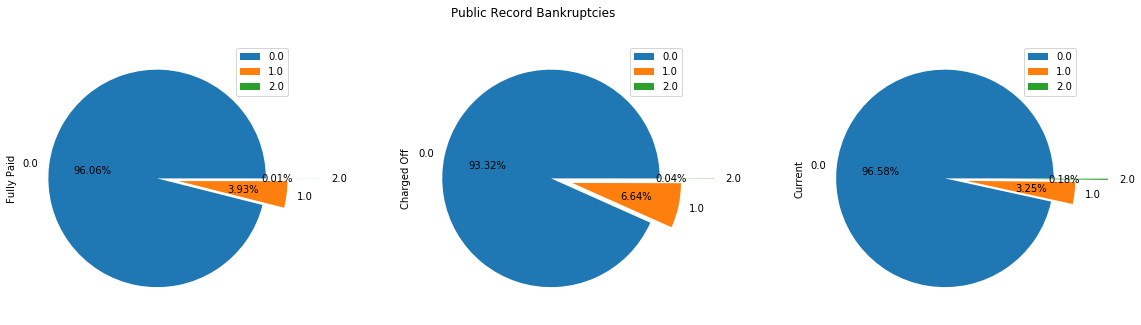

In [25]:
#Note that every time we are recreating ldf_fully_paid, ldf_charged_off, ldf_current datasets so that any new
# columns added in previous steps for any analysis get purged and a fresh dataset for analysis is available


ldf_fully_paid = ldf.loc[ (ldf['loan_status'] == 'Fully Paid'), :]
ldf_charged_off = ldf.loc[ (ldf['loan_status'] == 'Charged Off'), :]
ldf_current = ldf.loc[ (ldf['loan_status'] == 'Current'), :]


ldf_fully_paid_pub_pvt  = ldf_fully_paid.pivot_table(values = 'id', 
                                                             index = ['pub_rec_bankruptcies'], 
                                                            aggfunc = 'count').reindex()


ldf_charged_off_pub_pvt  = ldf_charged_off.pivot_table(values = 'id', 
                                                             index = ['pub_rec_bankruptcies'], 
                                                            aggfunc = 'count').reindex()


ldf_current_pub_pvt  = ldf_current.pivot_table(values = 'id', 
                                                             index = ['pub_rec_bankruptcies'], 
                                                            aggfunc = 'count').reindex()

ldf_fully_paid_pub_pvt.rename(columns={"id": "Fully Paid"} , inplace = True)
ldf_charged_off_pub_pvt.rename(columns={"id": "Charged Off"} , inplace = True)
ldf_current_pub_pvt.rename(columns={"id": "Current"} , inplace = True)

ldf_current_pub_pvt

ldf_pub_pvt = pd.concat([ldf_fully_paid_pub_pvt, ldf_charged_off_pub_pvt, ldf_current_pub_pvt], axis = 1)

explode = (0, 0.2, 0.5)
# Note that "explode" is generally used to highlight the chunk of the pie that you want highlighted

ldf_pub_pvt.plot.pie(subplots=True, figsize=(20, 5), autopct='%1.2f%%' , title='Public Record Bankruptcies' , explode = explode )


#### Summary - 

As Can be clearly seen above, this univariate analysis shows that just having `Public Bankruptcy record` does not help much ; As the total bankruptcy records are: <br>
1) less than 4% in fully paid loans <br>
2) less than 7% in Charged off loans <br> 
3) less than 4% in current loans <br>


`Let us now see if Home Ownership is helping analyse any pattern ` 

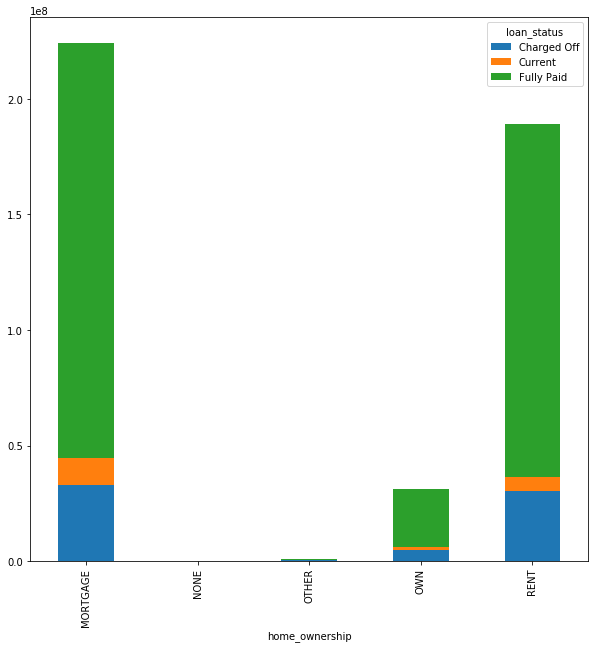

In [26]:
#Note that every time we are recreating ldf_fully_paid, ldf_charged_off, ldf_current datasets so that any new
# columns added in previous steps for any analysis get purged and a fresh dataset for analysis is available


ldf_fully_paid = ldf.loc[ (ldf['loan_status'] == 'Fully Paid'), :]
ldf_charged_off = ldf.loc[ (ldf['loan_status'] == 'Charged Off'), :]
ldf_current = ldf.loc[ (ldf['loan_status'] == 'Current'), :]

ldf.groupby(['home_ownership' , 'loan_status'])['loan_amnt'].sum().unstack().plot(kind='bar',stacked=True , figsize=(10,10))



##### Summary - Home ownership check

1) People who own a house are very less likely to default as per data <br>

`Let us now analyse number of The number of open credit lines in the borrower's credit file` or `open_acc`

In [27]:
ldf.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,delinq_amnt,pub_rec_bankruptcies,positive_keyword,negative_keyword
3,1076863,1277178,10000,10000,10000.0,36,13,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,personel,917,CA,20.00,0,1996-02-01,1,35.0,0.0,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.0,0.0,2015-01-01,357.48,2016-04-01,0,0.0,1,1
4,1075358,1311748,3000,3000,3000.0,60,12,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,other,Personal,972,OR,17.94,0,1996-01-01,0,38.0,0.0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.0,0.0,2016-05-01,67.79,2016-05-01,0,0.0,1,1


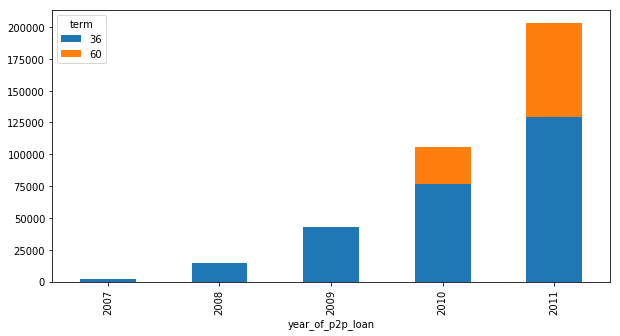

In [28]:
#Note that every time we are recreating ldf_fully_paid, ldf_charged_off, ldf_current datasets so that any new
# columns added in previous steps for any analysis get purged and a fresh dataset for analysis is available

# We assign loan stat numerical values 0,1 and 2 ; although not used, if in case we need to analyze we can use scatter plots
# extract year from issue_d column
# Perform bivariate analysis by grouping by and directly applying plot function with stacking 

ldf_oa_fp = ldf.loc[ (ldf['loan_status'] == 'Fully Paid'), :]
ldf_oa_co = ldf.loc[ (ldf['loan_status'] == 'Charged Off'), :]
ldf_oa_cur = ldf.loc[ (ldf['loan_status'] == 'Current'), :]

ldf_oa_fp['loan_stat'] = 0
ldf_oa_co['loan_stat'] = 1
ldf_oa_cur['loan_stat'] = 2



ldf_oa = pd.concat([ldf_oa_fp, ldf_oa_co, ldf_oa_cur], axis = 0)

ldf_oa = ldf_oa[["id", "loan_stat", 'open_acc' , 'issue_d' , 'term']]

ldf_oa['year_of_p2p_loan'] = ldf_oa['issue_d'].dt.year

ldf_oa.groupby(['year_of_p2p_loan' , 'term'])['open_acc'].sum().unstack().plot(kind='bar',stacked=True , figsize=(10,5))

#### Summary

Trend is that those who tried to seek peer to peer loan from Lending club  have also opened multiple accounts elsewhere ; this has increased over these years <br>

1) Number of people who Opted for `short term loans (36 months)` `opened more Credit lines` as compared to those who opted for `long term loans(60 months)` <br>

#### Let's analyse `Negative keywords` within defaulting loans  and `positive keywords` within fully paid loans to see if there is any strong correlation visible : 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a209818d0>],
      dtype=object)

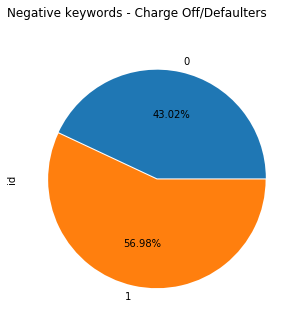

In [29]:
# Analyse positive keyword for the fully paid loan to see if there is any strong correlation

ldf_oa_co = ldf.loc[ (ldf['loan_status'] == 'Charged Off'), :]
ldf_oa_cur = ldf.loc[ (ldf['loan_status'] == 'Current'), :]
ldf_oa_fp = ldf.loc[ (ldf['loan_status'] == 'Fully Paid'), :]

# ldf_oa_co.groupby(['negative_keyword' , 'loan_status'])['id'].count().unstack().plot(kind='bar',stacked=True , figsize=(10,10))
# Note that "explode" is generally used to highlight the chunk of the pie that you want highlighted
explode = (0, 0.01)

ldf_oa_co.groupby(['negative_keyword'])['id'].count().plot.pie(subplots=True, figsize=(20, 5), autopct='%1.2f%%' , title='Negative keywords - Charge Off/Defaulters ', explode= explode )



array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a20ab84e0>],
      dtype=object)

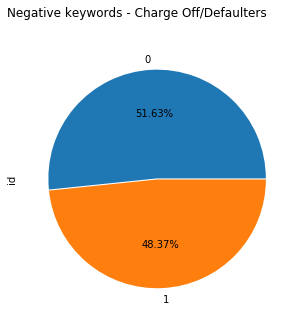

In [30]:
# Analyse positive keyword for the fully paid loan to see if there is any strong correlation
ldf_oa_fp.groupby(['positive_keyword'])['id'].count().plot.pie(subplots=True, figsize=(20, 5), autopct='%1.2f%%' , title='Negative keywords - Charge Off/Defaulters ', explode= explode )


#### Let's analyse Employment length where defaulted

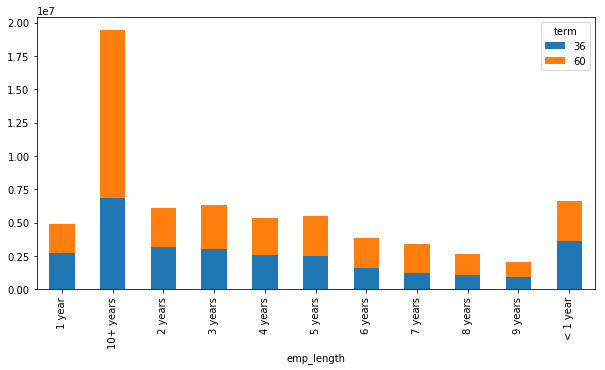

In [31]:

ldf_charged_off = ldf.loc[ (ldf['loan_status'] == 'Charged Off'), :]

ldf_charged_off.groupby(['emp_length' , 'term'])['loan_amnt'].sum().unstack().plot(kind='bar',stacked=True , figsize=(10,5))

# People with 10+ years of experience have defaulted more than anyone else as it stands out apart from the rest



As can be clearly seen, Employees with `10+ years` of experience have defaulted more than anyone else

#### Summary of negative keyword analysis on defaulting loans

As seen, we have about 57% of n`Negative keywords` in the charged off dataset and are an indicator of loan going default. Keep a watch on this as an additional parameter before approving a loan

##### Since negative keyword/positive keyword checks are not revealing any strong correlation pattern as seen above, we defer this field from analysing further


#### Garbage collect and free the memory using `del` and `gc.collect()`

https://docs.python.org/3/library/gc.html <br>

Sometimes python may not free memory and good to have this in place; once your analysis is performed, all the intermediate dataframes and variables with values lie idle and may cause issues in the longer run (if python does not reclaim the space automtatically although it is designed to do so), hence explicitly mentioning garbage collect and release the space back to memory is recommended

In [32]:
# Delete all temporary dataframes in the same order and Garbage collect so we just have one final dataframe
# that can be printed out from our analysis or exported to csv for any further analysis if needed

del [[n1 , pct99plusnull ,pct99plusnullcols , positive_1, positive_0, positive_keywords ,tmp , pctnull ,
      ldf_spread , ldf_charged_off ,ldf_charged_off_zip3_analysis , ldf_default_top_10 , plt, 
      ldf_co_subgrade, ldf_fully_paid , ldf_current , ldf_fully_paid_pub_pvt,
      ldf_charged_off_pub_pvt , ldf_current_pub_pvt , ldf_pub_pvt , negative_keywords,
      ldf_oa_fp, ldf_oa_co, ldf_oa_cur , ldf_oa , ldf_zipcode_60 , ldf_zipcode_36 , ldf_zipcode ]]

gc.collect()

5975

In [33]:
# End of code, print total time taken for execution
print('\nTime elasped: ', datetime.now() - startTime)
#


Time elasped:  0:00:13.593623
